## Using a Conv2D Layer

In [35]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
%matplotlib inline
torch.manual_seed(0)

In [45]:
def show_data(data, shape):
    plt.imshow(data.reshape(shape), cmap='gray')
    plt.show()

In [36]:
model = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3))
model.state_dict()['weight'][0][0] = torch.FloatTensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
model.state_dict()['bias'][0] = 0.0
model.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


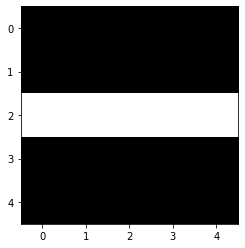

In [46]:
image = torch.zeros(1, 1, 5, 5)
image[0, 0:, 2] = 1
print(image)
show_data(image.numpy(), (5, 5))

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], grad_fn=<MkldnnConvolutionBackward>)


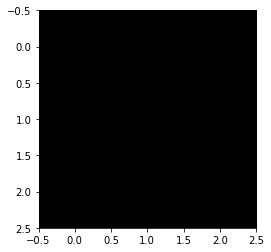

In [47]:
z = model(image)
print(z)
show_data(z.detach().numpy(), (3, 3))

In [48]:
model2 = nn.Conv2d(1, 1, kernel_size=(2, 2))
model2.state_dict()['weight'][0][0] = torch.tensor([[1.0,1.0],[1.0,1.0]])
model2.state_dict()['bias'][0] = 0.0
model2.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])


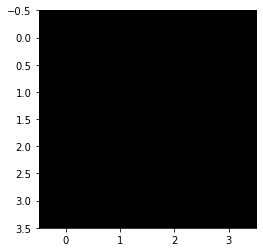

In [50]:
image2 = torch.ones(1, 1, 4, 4)
print(image2)
show_data(image2.numpy(), (4, 4))

tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<MkldnnConvolutionBackward>)


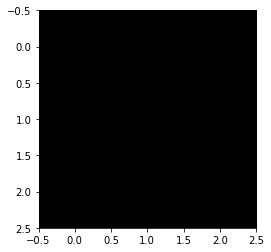

In [52]:
z2 = model2(image2)
print(z2)
show_data(z2.detach().numpy(), (3, 3))

In [53]:
model3 = nn.Conv2d(1, 1, kernel_size=(2, 2), stride=(2, 2))
model3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
model3.state_dict()['bias'][0]=0.0
model3.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<MkldnnConvolutionBackward>)


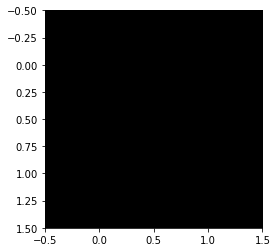

In [55]:
z3 = model3(image2)
print(z3)
show_data(z3.detach().numpy(), (2, 2))

In [56]:
model5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

model5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
model5.state_dict()['bias'][0]=0.0
model5.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<MkldnnConvolutionBackward>)


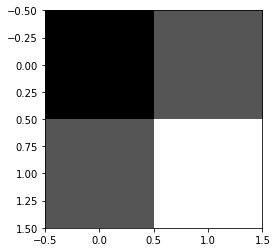

In [59]:
z5 = model5(image2)
print(z5)
show_data(z5.detach().numpy(), (2, 2)) # The stride of 3 and padding of 1 causes any kernel capture over the image to have vals of 0

tensor([[[[-0.7425,  0.5627,  0.2596, -0.1740],
          [-0.6787,  0.9383,  0.4889, -0.6731],
          [ 0.0845, -1.2001, -0.0048, -0.5181],
          [-0.3067, -1.5810,  1.7066, -0.4462]]]])


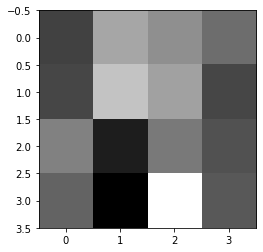

In [61]:
Image=torch.randn((1,1,4,4))
print(Image)
show_data(Image.numpy(), (4, 4))

In [63]:
model = nn.Conv2d(1, 1, kernel_size=(3, 3))
model.state_dict()['weight'][0][0]=torch.tensor([[0,0,0],[0,0,0],[0,0.0,0]])
model.state_dict()['bias'][0]=0.0

tensor([[[[0., 0.],
          [0., 0.]]]], grad_fn=<MkldnnConvolutionBackward>)


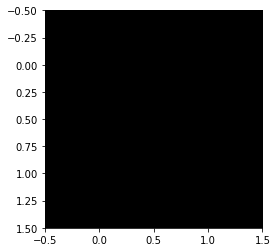

In [67]:
z = model(Image)
print(z)
show_data(z.detach().numpy(), (2, 2))